Constrained Linear programming


(-3, 4)

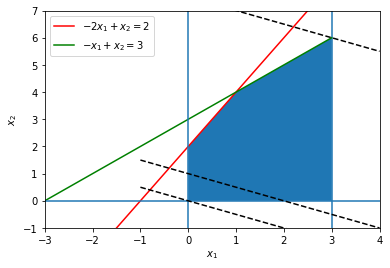

In [53]:
import matplotlib.pyplot as pl
import numpy as np
x1=np.arange(-3,4)
# definimos espacio de parametros posibles
#constraint 1  -2x1+x2< 2
c1=(2*x1+2)
fig, ax = pl.subplots()
pl.plot(x1,c1,'r',label=r'$-2x_1+x_2=2$')
#constraint 2  x1 < 3
pl.axvline(x=3)
#constraint 3  -x1+x2<=3
c3=3+x1
pl.plot(x1,c3,'g',label=r'$-x_1+x_2=3$')
#contraint  4   x1,x2>0
pl.axhline(y=0)
pl.axvline(x=0)
pl.ylim(-1,7)
pl.xlabel(r'$x_1$')
pl.ylabel(r'$x_2$')
x1=np.arange(0,4)
c3=3+x1
c1=(2*x1+2)
y4 = np.minimum(c1, c3)
ax.fill_between(x1, y4,np.zeros(len(c1)))
pl.legend()
x1=np.arange(-1,5)
pl.xlim(-3,4)
pl.plot(x1,-x1/2.,'k--')
pl.plot(x1,(2-x1)/2.,'k--')
pl.plot(x1,(15-x1)/2.,'k--')

pl.xlim(-3,4)

z=-15,x1=3,x2=6

Resolvemos con python. 
Resolvemos con "trust-constr" que poner las ecuaciones en un objeto 
LinearConstraint(A, lb, ub)  donde lb <= A.dot(x) <= ub. A tiene dimension num variables = 2 x numero de inequaciones en este caso 2, el resto vendrá definido en bounds

In [83]:
def func(x):
    return -x[0]-2*x[1]

In [88]:
import scipy.optimize as opt
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
bounds=Bounds([0,0],[3,np.inf])
lb=[-np.inf,-np.inf]
ub=[2,3]
A=[[-2,1],[-1,1]]
LinCons=LinearConstraint(A,lb,ub)
def Jac(x):
    return [-1.,-2.]
res = opt.minimize(func, [3,6], method='trust-constr', jac=Jac,hess='3-point',constraints=LinCons,options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 1.03e-09, constraint violation: 0.00e+00, execution time: 0.03 s.


In [89]:
print res


 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000000000007
          cg_niter: 7
      cg_stop_cond: 4
            constr: [array([-3.07545917e-05,  2.99992148e+00]), array([2.99995224, 5.99987372])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.029944181442260742
               fun: -14.999699665966606
              grad: array([-1., -2.])
               jac: [array([[-2,  1],
       [-1,  1]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([7.97552246e-10, 1.03036826e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 8
              nhev: 0
             niter: 12
              njev: 62
        optimality: 1.0303682629568404e-09
            status: 1
         tr_radius: 6129.996991655158
                 v: [array([7.99989110e-05, 1.99994667e+00]), array([ 3.00

In [90]:
print 'PUNTO función es mínima',np.round(res.x),'valor Función',np.round(res.fun)

PUNTO función es mínima [3. 6.] valor Función -15.0


CASO NO LINEAL: RESOLVER 

    z=-2x1*x2+x2**2
    
    con las mismas condiciones

In [ ]:
# si tenemos equacion no-Lineal  con las mismas inequaciones, lo mismo, tenemos que recalcular el gradiente
def func(x):
    return -2*x[0]*x[1]+x[1]**2
def jac(x):
    return [-2*x[1],2*x[1]]
res = opt.minimize(func, [3,6], method='trust-constr', jac=jac,hess='3-point',constraints=LinCons,options={'verbose': 1}, bounds=bounds)